# Tree SHAP

The algorithm provides human interpretable explanations suitable for regression and classification of models with tree structure applied to tabular data. This method is a member of the additive feature attribution methods class; feature attribution refers to the fact that the change of an outcome to be explained (e.g., a class probability in a classification problem) with respect to a baseline (e.g., average prediction probability for that class in the training set) can be attributed in different proportions to the model input features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
import alibi
from alibi.explainers import TreeShap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('filtered_2.csv')
df.drop(['stop_sequence', 'route_id','Origin','Destination'], axis = 1, inplace = True)
df.head()

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,monday,tuesday,wednesday,thursday,friday,saturday,sunday,delay
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,NaN
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
4,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0.0


In [3]:
df = df[df['delay'].notna()]

In [4]:
# extract feature names
feature_names = df.columns.tolist()
feature_names.remove('delay')

# define target names
target_names = ['delay']

# define categorical columns
categorical_columns_names = []

# define categorical and numerical indices for later preprocessing
categorical_columns_indices = [feature_names.index(cn) for cn in categorical_columns_names]
numerical_columns_indices = [feature_names.index(fn) for fn in feature_names if fn not in categorical_columns_names]

# extract data
X = df[feature_names]
y = df['delay']

# split data in train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Defining the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [6]:
# Evaluating model performance:

# Making predictions on the training set
train_predictions = model.predict(X_train)

# Making predictions on the test set
test_predictions = model.predict(X_test)

In [7]:
# Calculate the R-squared value
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

In [8]:
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

In [9]:
print(f'Training R-Square Value: {r2_train}')
print(f'Test R-Square Value: {r2_test}')
print(f'Training MSE Value: {mse_train}')
print(f'Test MSE Value: {mse_test}')

Training R-Square Value: 0.7341226776229755
Test R-Square Value: -19.824895288999347
Training MSE Value: 228.35003455081628
Test MSE Value: 50.64235899824841


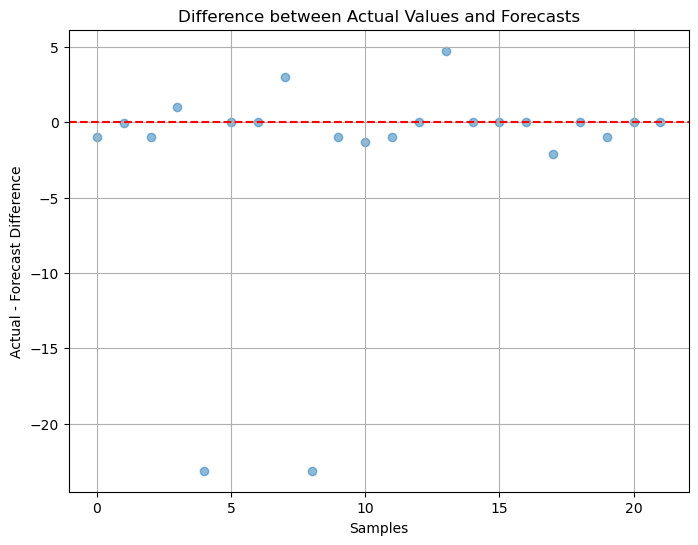

In [10]:
# Graph showing the difference between actual values and forecasts
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test - test_predictions, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Actual - Forecast Difference')
plt.title('Difference between Actual Values and Forecasts')
plt.grid(True)
plt.show()

In [11]:
# Tree SHAP
explainer = TreeShap(model, model_output='regression')
explainer.fit(X_train)

Unrecognised model output regression. Defaulting to model_output='raw'
Predictor returned a scalar value. Ensure the output represents a probability or decision score as opposed to a classification label!


TreeShap(meta={
  'name': 'TreeShap',
  'type': ['whitebox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'model_output': 'raw',
              'summarise_background': False,
              'summarise_result': None,
              'approximate': None,
              'interactions': None,
              'explain_loss': None,
              'algorithm': 'interventional',
              'kwargs': {}}
            ,
  'version': '0.9.5'}
)

In [12]:
# Index of the instance from which you want to get the description
sample_idx = 1
# Get the selected instance
sample = X_test.iloc[[sample_idx]]
sample

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,monday,tuesday,wednesday,thursday,friday,saturday,sunday
11,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [13]:
# Explanation
explanation = explainer.explain(sample)

In [14]:
# Taking SHAP values
shap_values = explanation.shap_values

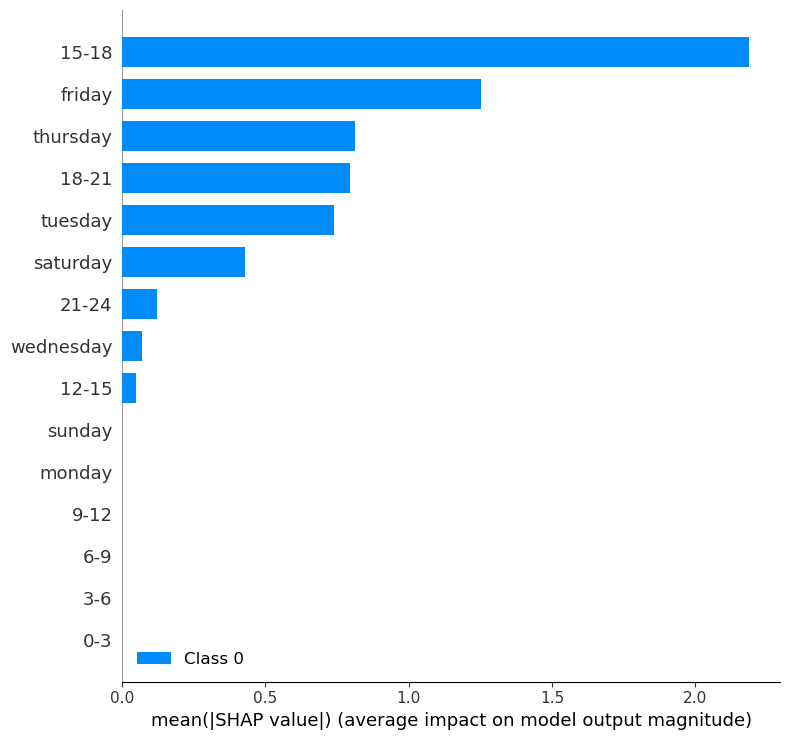

In [15]:
# Visualizing SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)